<a href="https://colab.research.google.com/github/jinyoung0711/DL_study/blob/master/DeepLearning_with_Keras_Chapter4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [ ]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [ ]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 100ms/step - loss: 0.4583 - acc: 0.8263 - val_loss: 0.3480 - val_acc: 0.8741
Epoch 2/20
49/49 [==============================] - 3s 64ms/step - loss: 0.2652 - acc: 0.9076 - val_loss: 0.3027 - val_acc: 0.8791
Epoch 3/20
49/49 [==============================] - 2s 48ms/step - loss: 0.2046 - acc: 0.9270 - val_loss: 0.2979 - val_acc: 0.8802
Epoch 4/20
49/49 [==============================] - 2s 50ms/step - loss: 0.1703 - acc: 0.9399 - val_loss: 0.2961 - val_acc: 0.8831
Epoch 5/20
49/49 [==============================] - 3s 52ms/step - loss: 0.1456 - acc: 0.9488 - val_loss: 0.3075 - val_acc: 0.8811
Epoch 6/20
49/49 [==============================] - 4s 76ms/step - loss: 0.1318 - acc: 0.9542 - val_loss: 0.3256 - val_acc: 0.8780
Epoch 7/20
49/49 [==============================] - 3s 70ms/step - loss: 0.1140 - acc: 0.9614 - val_loss: 0.3648 - val_acc: 0.8689
Epoch 8/20
49/49 [==============================] - 4s 77ms/step - loss: 0.0999 - 

In [ ]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 82ms/step - loss: 0.5342 - acc: 0.7992 - val_loss: 0.4263 - val_acc: 0.8624
Epoch 2/20
49/49 [==============================] - 4s 81ms/step - loss: 0.3460 - acc: 0.8916 - val_loss: 0.3349 - val_acc: 0.8825
Epoch 3/20
49/49 [==============================] - 2s 50ms/step - loss: 0.2657 - acc: 0.9111 - val_loss: 0.2966 - val_acc: 0.8894
Epoch 4/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2204 - acc: 0.9256 - val_loss: 0.2863 - val_acc: 0.8862
Epoch 5/20
49/49 [==============================] - 3s 57ms/step - loss: 0.1914 - acc: 0.9346 - val_loss: 0.2795 - val_acc: 0.8874
Epoch 6/20
49/49 [==============================] - 2s 47ms/step - loss: 0.1704 - acc: 0.9423 - val_loss: 0.2817 - val_acc: 0.8872
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1552 - acc: 0.9470 - val_loss: 0.2870 - val_acc: 0.8860
Epoch 8/20
49/49 [==============================] - 3s 53ms/step - loss: 0.1414 - a

In [ ]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt

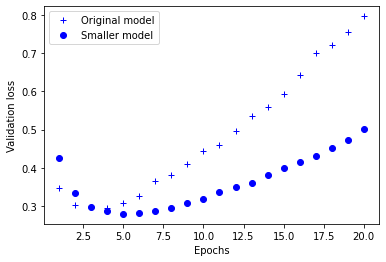

In [ ]:
# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 47s 932ms/step - loss: 0.5058 - acc: 0.7853 - val_loss: 0.2892 - val_acc: 0.8815
Epoch 2/20
49/49 [==============================] - 36s 733ms/step - loss: 0.2350 - acc: 0.9077 - val_loss: 0.2721 - val_acc: 0.8908
Epoch 3/20
49/49 [==============================] - 35s 725ms/step - loss: 0.1192 - acc: 0.9556 - val_loss: 0.5820 - val_acc: 0.8134
Epoch 4/20
49/49 [==============================] - 38s 778ms/step - loss: 0.0681 - acc: 0.9794 - val_loss: 0.4224 - val_acc: 0.8733
Epoch 5/20
49/49 [==============================] - 35s 718ms/step - loss: 0.0961 - acc: 0.9854 - val_loss: 0.3900 - val_acc: 0.8804
Epoch 6/20
49/49 [==============================] - 36s 732ms/step - loss: 0.0015 - acc: 0.9999 - val_loss: 0.6341 - val_acc: 0.8844
Epoch 7/20
49/49 [==============================] - 40s 815ms/step - loss: 1.3213e-04 - acc: 1.0000 - val_loss: 0.8197 - val_acc: 0.8817
Epoch 8/20
49/49 [==============================] - 38s 771ms/ste

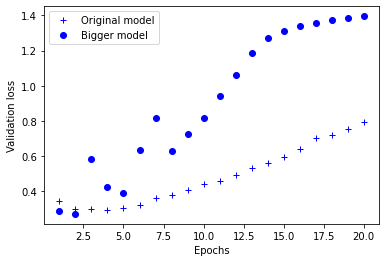

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

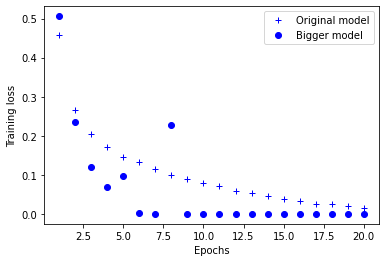

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가

L2 규제 : 가중치의 제곱에 비례하는 비용이 추가된다. L2 규제는 신경망에서 가중치 감쇠(weight decay)라고도 부른다. 

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 84ms/step - loss: 0.5005 - acc: 0.8218 - val_loss: 0.3845 - val_acc: 0.8741
Epoch 2/20
49/49 [==============================] - 2s 46ms/step - loss: 0.3156 - acc: 0.9024 - val_loss: 0.3351 - val_acc: 0.8880
Epoch 3/20
49/49 [==============================] - 3s 52ms/step - loss: 0.2706 - acc: 0.9194 - val_loss: 0.3338 - val_acc: 0.8856
Epoch 4/20
49/49 [==============================] - 2s 47ms/step - loss: 0.2510 - acc: 0.9263 - val_loss: 0.3356 - val_acc: 0.8842
Epoch 5/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2376 - acc: 0.9336 - val_loss: 0.3404 - val_acc: 0.8838
Epoch 6/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2270 - acc: 0.9387 - val_loss: 0.3573 - val_acc: 0.8789
Epoch 7/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2211 - acc: 0.9400 - val_loss: 0.3559 - val_acc: 0.8790
Epoch 8/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2164 - a

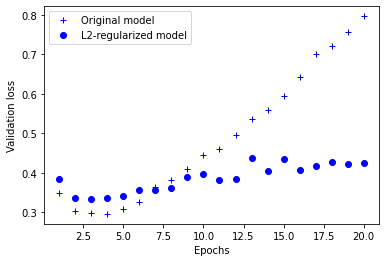

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

L2 규제를 사용한 모델이 기본 모델보다 과대적합에 더 잘 견디고 있다.

케라스에서 L2 규제 대신 다음과 같은 가중치 규제 중 하나 사용 가능



```
from keras import regularizers

regularizers.l1(0.001) # L1 규제

regularizers.l1_l2(l1=0.001, l2=0.001) # L1 L2 규제 병행
 ```



In [ ]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 59ms/step - loss: 0.5620 - acc: 0.8082 - val_loss: 0.4253 - val_acc: 0.8798
Epoch 2/20
49/49 [==============================] - 2s 46ms/step - loss: 0.3700 - acc: 0.8937 - val_loss: 0.3910 - val_acc: 0.8758
Epoch 3/20
49/49 [==============================] - 4s 85ms/step - loss: 0.3318 - acc: 0.9042 - val_loss: 0.3566 - val_acc: 0.8888
Epoch 4/20
49/49 [==============================] - 5s 92ms/step - loss: 0.3096 - acc: 0.9140 - val_loss: 0.3550 - val_acc: 0.8885
Epoch 5/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2974 - acc: 0.9178 - val_loss: 0.3642 - val_acc: 0.8850
Epoch 6/20
49/49 [==============================] - 2s 47ms/step - loss: 0.2888 - acc: 0.9230 - val_loss: 0.3645 - val_acc: 0.8835
Epoch 7/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2836 - acc: 0.9216 - val_loss: 0.3624 - val_acc: 0.8866
Epoch 8/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2732 - a

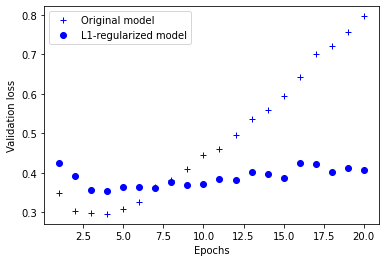

In [ ]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [ ]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 59ms/step - loss: 0.5638 - acc: 0.8132 - val_loss: 0.4313 - val_acc: 0.8785
Epoch 2/20
49/49 [==============================] - 2s 47ms/step - loss: 0.3789 - acc: 0.8924 - val_loss: 0.3784 - val_acc: 0.8839
Epoch 3/20
49/49 [==============================] - 2s 47ms/step - loss: 0.3341 - acc: 0.9050 - val_loss: 0.3615 - val_acc: 0.8879
Epoch 4/20
49/49 [==============================] - 2s 47ms/step - loss: 0.3154 - acc: 0.9114 - val_loss: 0.3585 - val_acc: 0.8876
Epoch 5/20
49/49 [==============================] - 2s 48ms/step - loss: 0.3048 - acc: 0.9154 - val_loss: 0.3864 - val_acc: 0.8747
Epoch 6/20
49/49 [==============================] - 2s 47ms/step - loss: 0.2969 - acc: 0.9176 - val_loss: 0.3669 - val_acc: 0.8833
Epoch 7/20
49/49 [==============================] - 2s 47ms/step - loss: 0.2916 - acc: 0.9220 - val_loss: 0.3663 - val_acc: 0.8856
Epoch 8/20
49/49 [==============================] - 2s 47ms/step - loss: 0.2838 - a

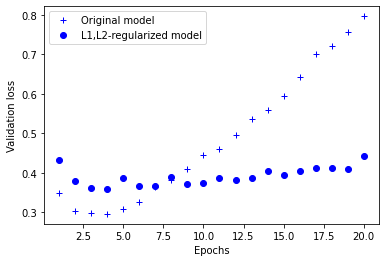

In [ ]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1l2_model_val_loss, 'bo', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 80ms/step - loss: 0.5893 - acc: 0.6802 - val_loss: 0.4441 - val_acc: 0.8599
Epoch 2/20
49/49 [==============================] - 2s 47ms/step - loss: 0.4442 - acc: 0.8166 - val_loss: 0.3409 - val_acc: 0.8844
Epoch 3/20
49/49 [==============================] - 2s 46ms/step - loss: 0.3582 - acc: 0.8715 - val_loss: 0.2962 - val_acc: 0.8888
Epoch 4/20
49/49 [==============================] - 2s 46ms/step - loss: 0.3028 - acc: 0.8983 - val_loss: 0.2782 - val_acc: 0.8915
Epoch 5/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2597 - acc: 0.9155 - val_loss: 0.2781 - val_acc: 0.8908
Epoch 6/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2306 - acc: 0.9257 - val_loss: 0.2922 - val_acc: 0.8868
Epoch 7/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2006 - acc: 0.9374 - val_loss: 0.3031 - val_acc: 0.8872
Epoch 8/20
49/49 [==============================] - 2s 46ms/step - loss: 0.1859 - a

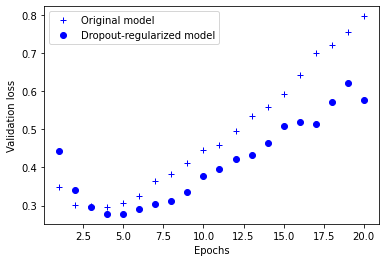

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### 신경망에서 과대적합을 방지하기 위해 널리 사용하는 방법

1. 훈련 데이터를 더 모은다.

2. 네트워크의 용량을 감소시킨다.

3. 가중치 규제를 추가한다.

4. 드롭아웃을 추가한다.